In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('nasa.csv')
df.head()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,...,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,2446862,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,...,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True
3,3092506,3092506,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,...,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False
4,3514799,3514799,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True


[Text(0.5, 0, 'Neo Reference ID'),
 Text(2.5, 0, 'Absolute Magnitude'),
 Text(4.5, 0, 'Est Dia in KM(max)'),
 Text(6.5, 0, 'Est Dia in M(max)'),
 Text(8.5, 0, 'Est Dia in Miles(max)'),
 Text(10.5, 0, 'Est Dia in Feet(max)'),
 Text(12.5, 0, 'Relative Velocity km per sec'),
 Text(14.5, 0, 'Miles per hour'),
 Text(16.5, 0, 'Miss Dist.(lunar)'),
 Text(18.5, 0, 'Miss Dist.(miles)'),
 Text(20.5, 0, 'Orbit Uncertainity'),
 Text(22.5, 0, 'Jupiter Tisserand Invariant'),
 Text(24.5, 0, 'Eccentricity'),
 Text(26.5, 0, 'Inclination'),
 Text(28.5, 0, 'Orbital Period'),
 Text(30.5, 0, 'Perihelion Arg'),
 Text(32.5, 0, 'Perihelion Time'),
 Text(34.5, 0, 'Mean Motion')]

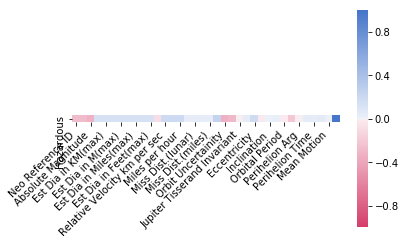

In [3]:
corr = df.corr().tail(n=1)
# Correlation gives a measure of linear relation of the continuous variable. 0 correlation implies a
# non-linear relation or independent variables
ax = sns.heatmap(corr,
                 vmin=-1,
                 vmax=1,
                 center=0,
                 cmap=sns.diverging_palette(0, 255, sep=1, n=256,
                                            as_cmap=True),
                 square=True)
ax.set_xticklabels(ax.get_xticklabels(),
                   rotation=45,
                   horizontalalignment='right')

In [4]:
pd.options.display.max_columns = None
df.head(n=1)

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),Est Dia in Feet(max),Close Approach Date,Epoch Date Close Approach,Relative Velocity km per sec,Relative Velocity km per hr,Miles per hour,Miss Dist.(Astronomical),Miss Dist.(lunar),Miss Dist.(kilometers),Miss Dist.(miles),Orbiting Body,Orbit ID,Orbit Determination Date,Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Epoch Osculation,Eccentricity,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.6,0.12722,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,1995-01-01,788947200000,6.115834,22017.003799,13680.509944,0.419483,163.178711,62753692.0,38993336.0,Earth,17,2017-04-06 08:36:37,5,0.025282,4.634,2458000.5,0.425549,1.407011,6.025981,314.373913,609.599786,0.808259,57.25747,2.005764,2.458162e+06,264.837533,0.590551,J2000,True


In [5]:
median_date = pd.to_datetime(df['Close Approach Date']).dt.date.head(n=(4687+1)//2).tail(n=1) # 4687 is the length of the length of the dataset (sorted in asc order of dateset)

In [6]:
median_date[2343]

datetime.date(2008, 2, 15)

In [7]:
df['closest approach days relative'] = pd.to_datetime(df['Close Approach Date']).dt.date - median_date[2343]

In [8]:
df['closest approach days relative'] /= np.timedelta64(1, 'D')
df['closest approach days relative'].head()

0   -4793.0
1   -4793.0
2   -4786.0
3   -4779.0
4   -4779.0
Name: closest approach days relative, dtype: float64

In [9]:
median_date_orbit = pd.to_datetime(df['Orbit Determination Date']).dt.date.head(n=(4687+1)//2).tail(n=1) # 4687 is the length of the length of the dataset (sorted in asc order of dateset)

In [10]:
median_date_orbit[2343]

datetime.date(2017, 4, 6)

In [11]:
df['Orbit determination days relative'] = pd.to_datetime(
    df['Orbit Determination Date']).dt.date - median_date_orbit[2343]
df['Orbit determination days relative'] /= np.timedelta64(1, 'D')
df['Orbit determination days relative']

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
5        59.0
6        83.0
7         0.0
8        39.0
9         0.0
10        0.0
11        0.0
12        0.0
13        0.0
14        0.0
15        0.0
16       42.0
17        0.0
18        0.0
19        0.0
20        0.0
21        0.0
22        0.0
23      112.0
24        0.0
25        0.0
26      136.0
27        0.0
28       14.0
29      -28.0
        ...  
4657      0.0
4658    114.0
4659    151.0
4660    112.0
4661      0.0
4662      0.0
4663    107.0
4664    105.0
4665      0.0
4666      0.0
4667      0.0
4668      0.0
4669     87.0
4670      0.0
4671      0.0
4672      0.0
4673      0.0
4674      0.0
4675      0.0
4676    126.0
4677      0.0
4678      0.0
4679      0.0
4680      0.0
4681      0.0
4682      0.0
4683      0.0
4684      0.0
4685      0.0
4686     23.0
Name: Orbit determination days relative, Length: 4687, dtype: float64

In [12]:
set(df['Orbiting Body'])

{'Earth'}

In [13]:
set(df['Equinox']) # As earth is the only orbiting body and J2000 is the only Equinox in the dataset..we won't include this column

{'J2000'}

In [14]:
X = df[[
    'Absolute Magnitude', 'Est Dia in KM(min)', 'Est Dia in KM(max)',
    'Epoch Date Close Approach', 'Relative Velocity km per sec',
    'Miss Dist.(Astronomical)', 'Orbit Uncertainity',
    'Minimum Orbit Intersection', 'Jupiter Tisserand Invariant',
    'Epoch Osculation', 'Eccentricity', 'Semi Major Axis', 'Inclination',
    'Asc Node Longitude', 'Orbital Period', 'Perihelion Distance',
    'Perihelion Arg', 'Aphelion Dist', 'Perihelion Time', 'Mean Anomaly',
    'Mean Motion', 'closest approach days relative',
    'Orbit determination days relative'
]]
X['avg est dia'] = df['Est Dia in KM(min)']+df['Est Dia in KM(max)']/2
Y = df['Hazardous']
X.head()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Epoch Date Close Approach,Relative Velocity km per sec,Miss Dist.(Astronomical),Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Epoch Osculation,Eccentricity,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,closest approach days relative,Orbit determination days relative,avg est dia
0,21.6,0.127220,0.284472,788947200000,6.115834,0.419483,5,0.025282,4.634,2458000.5,0.425549,1.407011,6.025981,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,-4793.0,0.0,0.269456
1,21.3,0.146068,0.326618,788947200000,18.113985,0.383014,3,0.186935,5.457,2458000.5,0.351674,1.107776,28.412996,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,-4793.0,0.0,0.309377
2,20.3,0.231502,0.517654,789552000000,7.590711,0.050956,0,0.043058,4.557,2458000.5,0.348248,1.458824,4.237961,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,-4786.0,0.0,0.490329
3,27.4,0.008801,0.019681,790156800000,11.173874,0.285322,6,0.005512,5.093,2458000.5,0.216578,1.255903,7.905894,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,-4779.0,0.0,0.018642
4,21.6,0.127220,0.284472,790156800000,9.840831,0.407832,1,0.034798,5.154,2458000.5,0.210448,1.225615,16.793382,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,-4779.0,0.0,0.269456


In [15]:
Y = pd.get_dummies(Y)
Y.head()

,False,True
0,0,1
1,1,0
2,0,1
3,1,0
4,0,1


In [16]:
X = X.to_numpy()
Y = Y.to_numpy()
X

array([[ 2.16000000e+01,  1.27219878e-01,  2.84472296e-01, ...,
        -4.79300000e+03,  0.00000000e+00,  2.69456027e-01],
       [ 2.13000000e+01,  1.46067964e-01,  3.26617897e-01, ...,
        -4.79300000e+03,  0.00000000e+00,  3.09376913e-01],
       [ 2.03000000e+01,  2.31502122e-01,  5.17654482e-01, ...,
        -4.78600000e+03,  0.00000000e+00,  4.90329363e-01],
       ...,
       [ 2.27000000e+01,  7.66575574e-02,  1.71411509e-01, ...,
         3.12800000e+03,  0.00000000e+00,  1.62363312e-01],
       [ 2.18000000e+01,  1.16025908e-01,  2.59441818e-01, ...,
         3.12800000e+03,  0.00000000e+00,  2.45746817e-01],
       [ 1.91090000e+01,  4.00640618e-01,  8.95859655e-01, ...,
         3.12800000e+03,  2.30000000e+01,  8.48570445e-01]])

In [17]:
from sklearn.preprocessing import MinMaxScaler
scalerX = MinMaxScaler()
scalerY = MinMaxScaler()
X = scalerX.fit_transform(X)
Y = scalerY.fit_transform(Y)

The accuracy of the model is :  0.9488272921108742


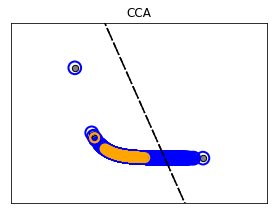

In [23]:
from sklearn.cross_decomposition import CCA
from sklearn.decomposition import PCA
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

def plot_hyperplane(clf, min_x, max_x, linestyle, label):
    # get the separating hyperplane
    w = clf.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(min_x - 5, max_x + 5)  # make sure the line is long enough
    yy = a * xx - (clf.intercept_[0]) / w[1]
    plt.plot(xx, yy, linestyle, label=label)


def plot_subfigure(X, Y, subplot, title):
    
    X, x_test, Y, y_test = train_test_split(X, Y, test_size=0.1)
    min_x = np.min(X[:, 0])
    max_x = np.max(X[:, 0])

    min_y = np.min(X[:, 1])
    max_y = np.max(X[:, 1])

    classif = OneVsRestClassifier(SVC(kernel='linear'))
    classif.fit(X, Y)

    results = classif.predict(x_test)==y_test
    print("The accuracy of the model is : ", (sum(results)/len(results))[0])
    plt.subplot(2, 2, subplot)
    plt.title(title)

    zero_class = np.where(Y[:, 0])
    one_class = np.where(Y[:, 1])
    plt.scatter(X[:, 0], X[:, 1], s=40, c='gray', edgecolors=(0, 0, 0))
    plt.scatter(X[zero_class, 0],
                X[zero_class, 1],
                s=160,
                edgecolors='b',
                facecolors='none',
                linewidths=2,
                label='Class 1')
    plt.scatter(X[one_class, 0],
                X[one_class, 1],
                s=80,
                edgecolors='orange',
                facecolors='none',
                linewidths=2,
                label='Class 2')

    plot_hyperplane(classif.estimators_[0], min_x, max_x, 'k--',
                    'Boundary\nfor class 1')
    plot_hyperplane(classif.estimators_[1], min_x, max_x, 'k-.',
                    'Boundary\nfor class 2')
    plt.xticks(())
    plt.yticks(())

    plt.xlim(min_x - .5 * max_x, max_x + .5 * max_x)
    plt.ylim(min_y - .5 * max_y, max_y + .5 * max_y)
    if subplot == 2:
        plt.xlabel('First principal component')
        plt.ylabel('Second principal component')
        plt.legend(loc="upper left")


plt.figure(figsize=(8, 6))

plot_subfigure(X, Y, 1, "CCA")

plt.subplots_adjust(.04, .02, .97, .94, .09, .2)
plt.show()